### document scanner

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

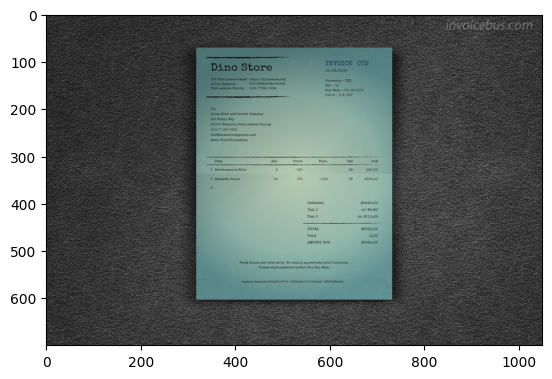

In [2]:
image = cv2.imread("images/invoice.jpg")
plt.imshow(image)
#TODO: show the image using matplotlib'


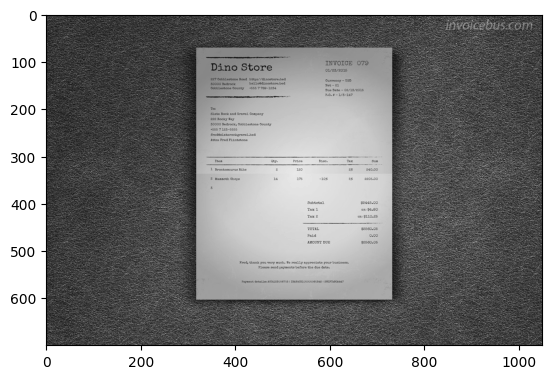

In [3]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap = "gray")
blur = cv2.GaussianBlur(img, (5,5),0)
edges = cv2.Canny(blur,100, 150)


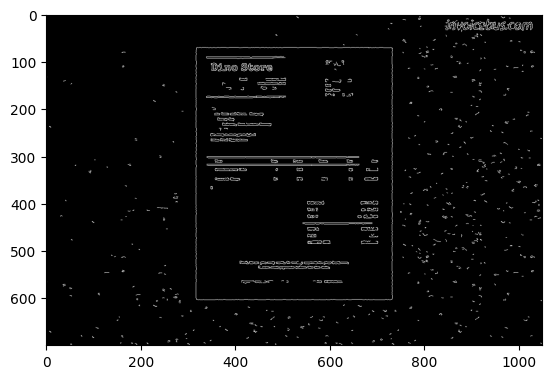

In [4]:
plt.imshow(edges,cmap="gray")

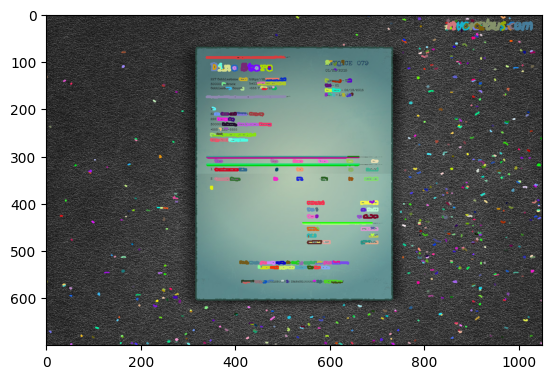

In [5]:
img = np.array(image)
c, h = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for c in c:
    cv2.drawContours(img, [c], -1, (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)), 2)
plt.imshow(img)

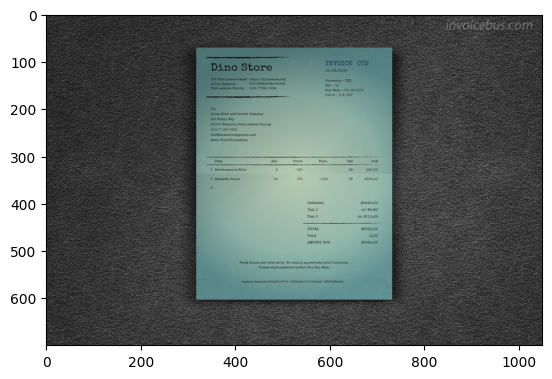

In [6]:
import imutils
img = np.array(image)
c = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL,
                     cv2.CHAIN_APPROX_SIMPLE)
c = imutils.grab_contours(c)
c = max(c, key=cv2.contourArea)

peri = cv2.arcLength(c, True)
doc = cv2.approxPolyDP(c, 0.02 * peri, True)

plt.imshow(img)

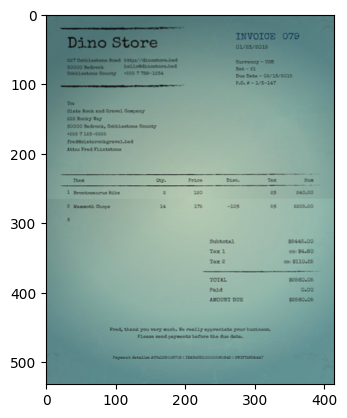

In [7]:
tl,bl,br,tr = doc.squeeze()

widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))

heightA = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
heightB = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
maxHeight = int(max(heightA, heightB))

dst = np.array([
    [0, 0],
    [0, maxHeight - 1],
    [maxWidth - 1, maxHeight - 1],
    [maxWidth - 1, 0]], dtype = "float32")

M = cv2.getPerspectiveTransform(doc.squeeze().astype(np.float32), dst)
warped = cv2.warpPerspective(image , M , (maxWidth, maxHeight), flags=cv2.INTER_LINEAR)
plt.imshow(warped)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

In [8]:
maxHeight

532

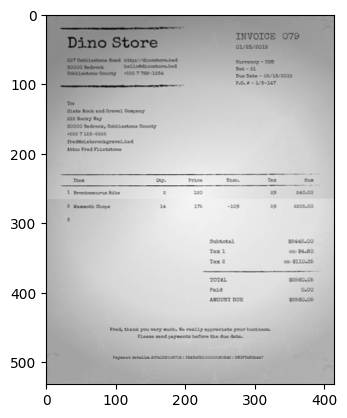

In [9]:
plt.imshow(warped, cmap="gray")

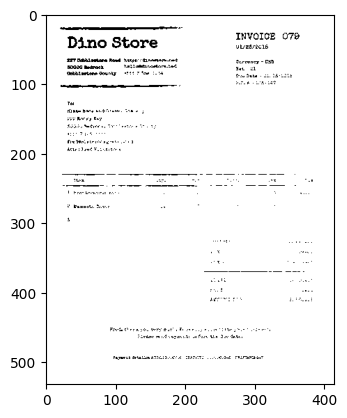

In [10]:
T,thr1 = cv2.threshold(warped,100,255,cv2.THRESH_BINARY)
plt.imshow(thr1, cmap = "gray")

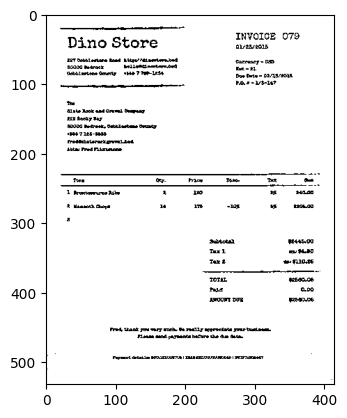

In [11]:
thr2 = cv2.adaptiveThreshold(warped, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)
plt.imshow(thr2, cmap = "gray")